# Community Detection

In [27]:
import sys

sys.path.insert(0, "../")

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import networkx as nx

## Get adjacency matrix

In [28]:
# Get the adjacency matrix from the data
adjacency_matrix = pd.read_csv("../../dataset/adjacency_matrix.csv").values

# Remove the last column of the adjacency matrix
adjacency_matrix = adjacency_matrix[:, :-1]

## Identify communities

Co-occurrence Matrix (Disease-Disease):
[[6 0 0 ... 0 0 2]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 7 0]
 [2 0 0 ... 0 0 11]]


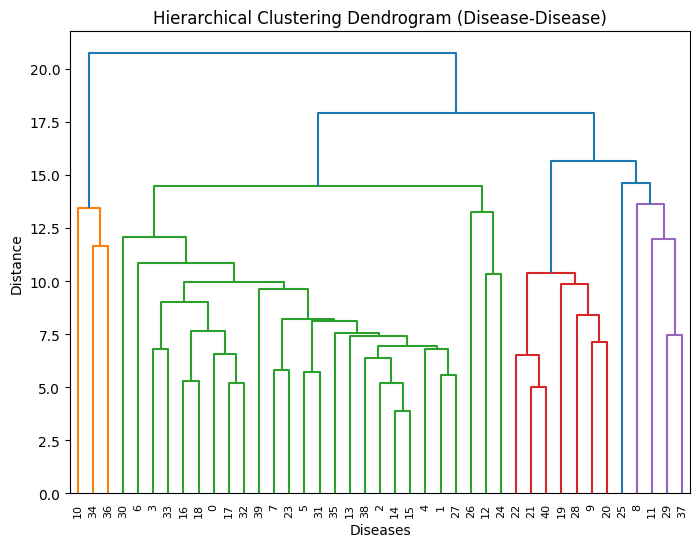

Communities: [frozenset({0, 3, 4, 9, 10, 13, 16, 17, 18, 21, 23, 25, 29, 30, 32, 33, 34, 36, 37, 40}), frozenset({1, 2, 35, 5, 38, 7, 8, 11, 14, 15, 27, 31}), frozenset({6, 39, 12, 19, 20, 22, 24, 26, 28})]
Modularity: 0.08420739534738093


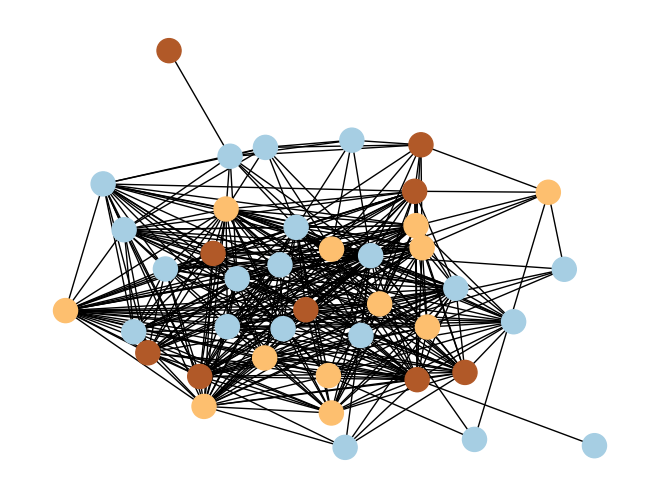

In [29]:
# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_d, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Disease-Disease)")
plt.xlabel("Diseases")
plt.ylabel("Distance")
plt.show()

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G))
print("Communities:", communities)
modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration
pos = nx.kamada_kawai_layout(G)  # You can choose other layout algorithms
nx.draw(G, pos, node_color=list(color_map.values()), with_labels=False, cmap=plt.cm.Paired)
plt.show()


Co-occurrence Matrix (Symptom-Symptom):
[[9 0 0 ... 1 5 7]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 1]
 [5 0 0 ... 1 7 6]
 [7 0 0 ... 1 6 8]]


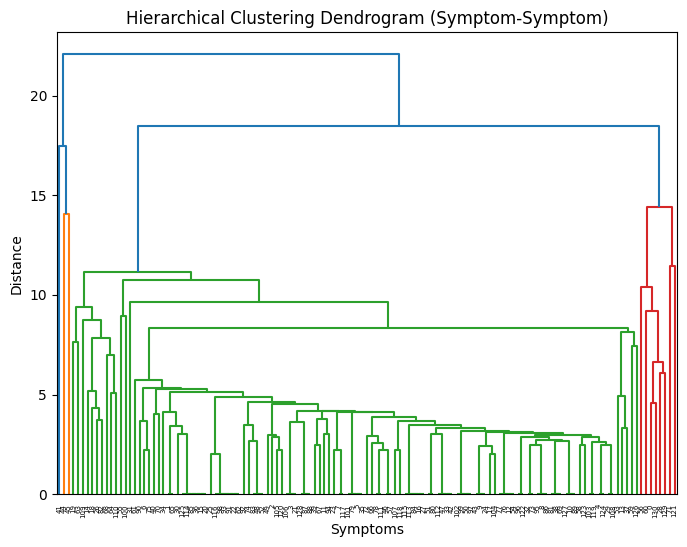

Communities: [frozenset({128, 0, 129, 130, 3, 4, 6, 7, 10, 11, 14, 19, 21, 23, 28, 29, 31, 32, 33, 39, 42, 44, 45, 47, 51, 55, 56, 60, 61, 63, 64, 67, 68, 71, 73, 75, 80, 87, 88, 89, 90, 100, 103, 106, 108, 110, 112, 117, 119, 121, 124, 127}), frozenset({1, 2, 5, 13, 15, 20, 30, 34, 35, 36, 37, 40, 41, 46, 48, 49, 52, 53, 57, 59, 65, 66, 70, 72, 74, 78, 79, 83, 85, 92, 101, 105, 109, 111, 114, 120, 123, 125, 126}), frozenset({9, 17, 82, 18, 22, 24, 25, 26, 91, 93, 94, 96, 98, 122, 104, 43, 107, 116, 118, 58, 62}), frozenset({16, 113, 115, 84, 27}), frozenset({12, 77, 54, 76}), frozenset({97, 50, 99, 102}), frozenset({81, 69, 38}), frozenset({8, 86, 95})]
Modularity: 0.2791189578538087


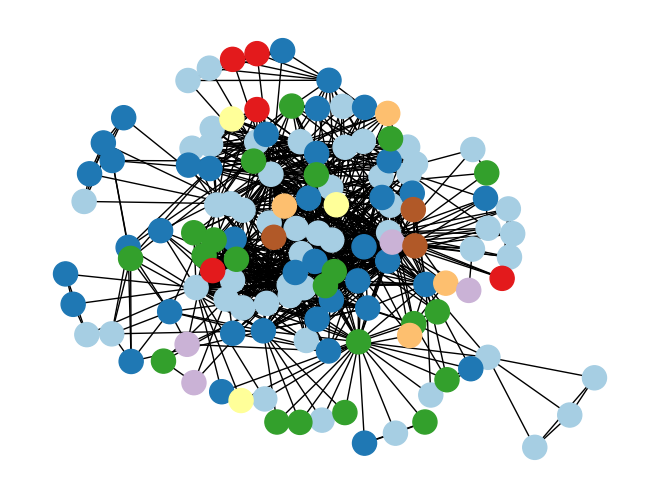

In [30]:
# Compute co-occurrence matrix symptoms-symptoms
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G = nx.Graph()
# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

# Perform hierarchical clustering
linkage_matrix = linkage(co_occurrence_matrix_s, method='average', metric='euclidean')

# Display the dendrogram
plt.figure(figsize=(8, 6))
dendrogram(linkage_matrix)
plt.title("Hierarchical Clustering Dendrogram (Symptom-Symptom)")
plt.xlabel("Symptoms")
plt.ylabel("Distance")
plt.show()

# Compute modularity using networkx
communities = list(nx.community.greedy_modularity_communities(G))
print("Communities:", communities)
modularity = nx.community.modularity(G, communities)
print("Modularity:", modularity)

# Create a color map for nodes based on community
color_map = {}
for i, community in enumerate(communities):
    color_map.update({node: i for node in community})

# Draw the graph with node coloration
pos = nx.kamada_kawai_layout(G)  # You can choose other layout algorithms
nx.draw(G, pos, node_color=list(color_map.values()), with_labels=False, cmap=plt.cm.Paired)
plt.show()

## ALTERNATIVE CODE

In [31]:
# function to plot graph with node colouring based on communities
def visualize_communities(graph, communities, i):
    node_colors = create_community_node_colors(graph, communities)
    modularity = round(nx.community.modularity(graph, communities), 6)
    title = f"Community Visualization of {len(communities)} communities with modularity of {modularity}"
    pos = nx.spring_layout(graph, k=0.3, iterations=50, seed=2)
    plt.subplot(3, 1, i)
    plt.title(title)
    nx.draw(
        graph,
        pos=pos,
        node_size=1000,
        node_color=node_colors,
        with_labels=True,
        font_size=20,
        font_color="black",
    )


# function to create node colour list
def create_community_node_colors(graph, communities):
    number_of_colors = len(communities[0])
    colors = ["#D4FCB1", "#CDC5FC", "#FFC2C4", "#F2D140", "#BCC6C8"][:number_of_colors]
    node_colors = []
    for node in graph:
        current_community_index = 0
        for community in communities:
            if node in community:
                node_colors.append(colors[current_community_index])
                break
            current_community_index += 1
    return node_colors

Co-occurrence Matrix (Disease-Disease):
[[6 0 0 ... 0 0 2]
 [0 4 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 4 0 0]
 [0 0 0 ... 0 7 0]
 [2 0 0 ... 0 0 11]]


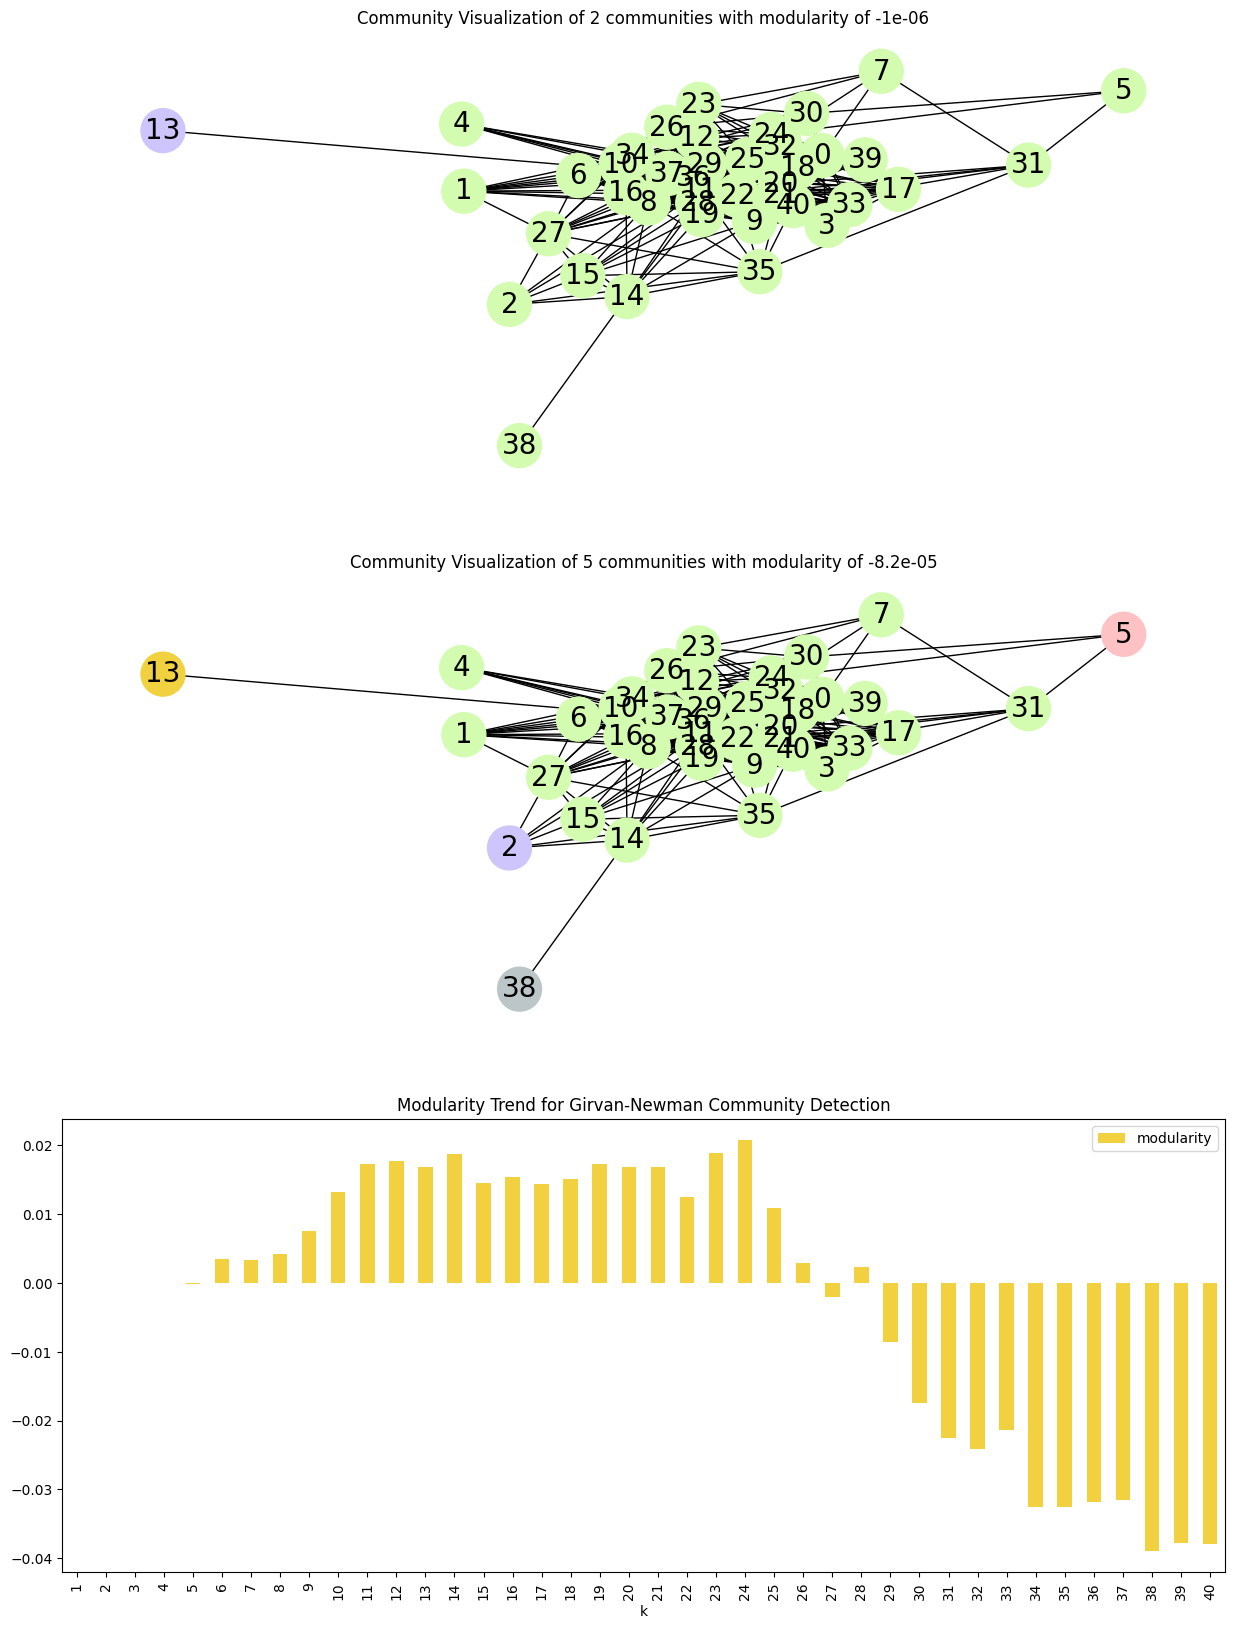

In [32]:
# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_d = np.matmul(adjacency_matrix, adjacency_matrix.T)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Disease-Disease):")
print(co_occurrence_matrix_d)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_d.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_d[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[3], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()

Co-occurrence Matrix (Symptom-Symptom):
[[9 0 0 ... 1 5 7]
 [0 2 0 ... 0 0 0]
 [0 0 2 ... 0 0 0]
 ...
 [1 0 0 ... 1 1 1]
 [5 0 0 ... 1 7 6]
 [7 0 0 ... 1 6 8]]


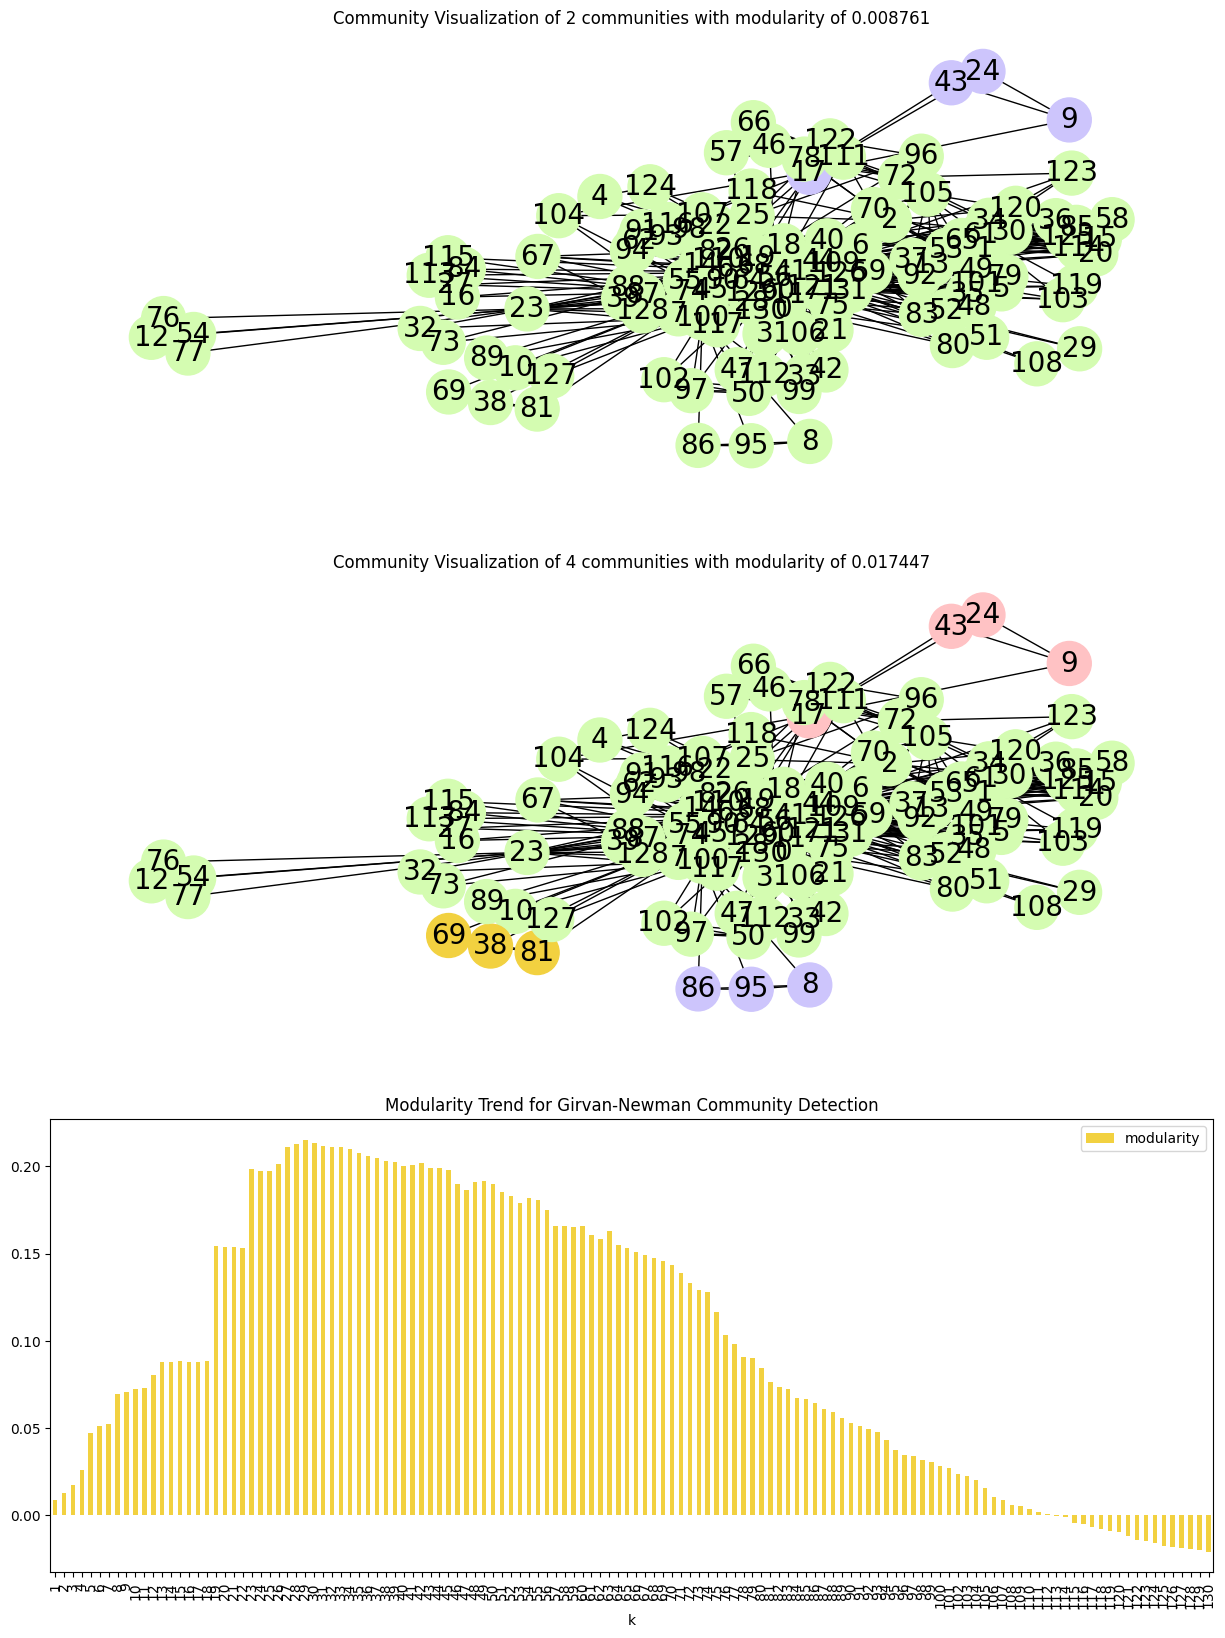

In [33]:
# Compute co-occurrence matrix disease-disease
co_occurrence_matrix_s = np.matmul(adjacency_matrix.T, adjacency_matrix)

# Display the co-occurrence matrix
print("Co-occurrence Matrix (Symptom-Symptom):")
print(co_occurrence_matrix_s)

# Create a weighted graph directly
G = nx.Graph()

# Add nodes to the graph
num_nodes = co_occurrence_matrix_s.shape[0]
G.add_nodes_from(range(num_nodes))

# Add weighted edges to the graph
for i in range(num_nodes):
    for j in range(i+1, num_nodes):
        weight = co_occurrence_matrix_s[i, j]
        if weight != 0:
            G.add_edge(i, j, weight=weight)

communities = list(nx.community.girvan_newman(G))

# Modularity -> measures the strength of division of a network into modules
modularity_df = pd.DataFrame(
    [
        [k + 1, nx.community.modularity(G, communities[k])]
        for k in range(len(communities))
    ],
    columns=["k", "modularity"],
)


fig, ax = plt.subplots(3, figsize=(15, 20))

# Plot graph with colouring based on communities
visualize_communities(G, communities[0], 1)
visualize_communities(G, communities[2], 2)

# Plot change in modularity as the important edges are removed
modularity_df.plot.bar(
    x="k",
    ax=ax[2],
    color="#F2D140",
    title="Modularity Trend for Girvan-Newman Community Detection",
)
plt.show()